In [9]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

import pandas as pd
import numpy as np

Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers


import numpy as np
import pandas as pd
import tensorflow as tf

SHUFFLE_BUFFER = 500
BATCH_SIZE = 2


numeric_feature_names = ['age', 'thalach', 'trestbps',  'chol', 'oldpeak']
numeric_features = df[numeric_feature_names]
numeric_features.head()

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(numeric_features))

normalizer(numeric_features.iloc[:3])

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

What approach will we use to find the optimal learning rate?

In [11]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')


# Convert date
df['dteday'] = pd.to_datetime(df['dteday'])

# Create total rentals (target variable)
df['total'] = df['casual'] + df['registered']

# Drop columns we won't use
df = df.drop(columns=['casual', 'registered'])

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)

# Features and target
X = df.drop(columns=['dteday', 'total'])
y = df['total']

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
# Learning Model Trial
def build_model(lr):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='mse',
        metrics=['mae']
    )

    return model

learning_rates = [0.1, 0.01, 0.001, 0.0001]
history_dict = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")

    model = build_model(lr)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=32,
        verbose=0
    )

    history_dict[lr] = history.history['val_loss']




Training with learning rate: 0.1


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with learning rate: 0.01

Training with learning rate: 0.001

Training with learning rate: 0.0001


KeyboardInterrupt: 

In [ ]:
# Plotting Results
for lr in learning_rates:
plt.plot(history_dict[lr], label=f"lr={lr}")

plt.title("Validation Loss for Different Learning Rates")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

When should they pull the bikes out of rotation for cleaning?

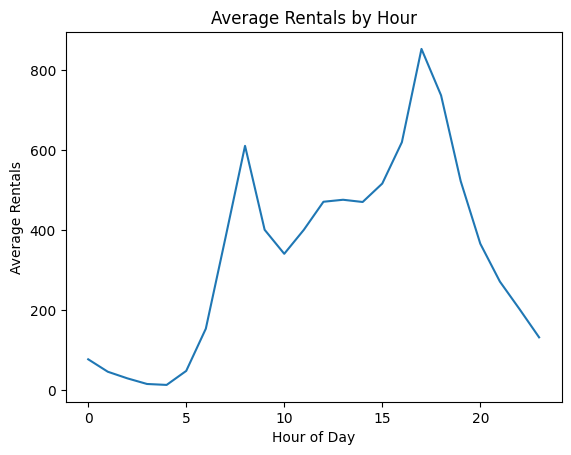

In [13]:
# Rentals by Hour
hourly = df.groupby('hr')['total'].mean()

plt.plot(hourly.index, hourly.values)
plt.title("Average Rentals by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rentals")
plt.show()

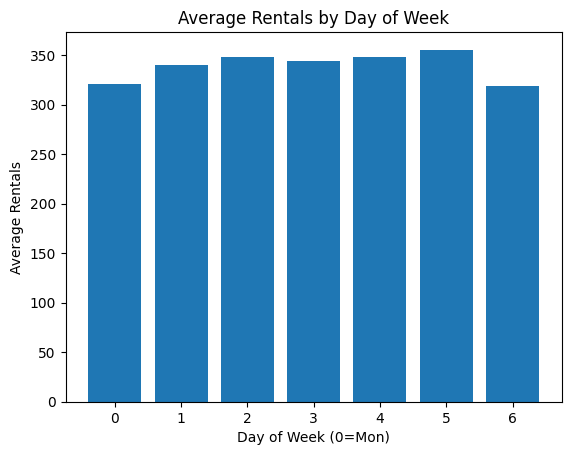

In [14]:
# Rentals by Day of Week
df['day_of_week'] = df['dteday'].dt.dayofweek  # 0 = Monday

daily = df.groupby('day_of_week')['total'].mean()

plt.bar(daily.index, daily.values)
plt.title("Average Rentals by Day of Week")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Average Rentals")
plt.show()

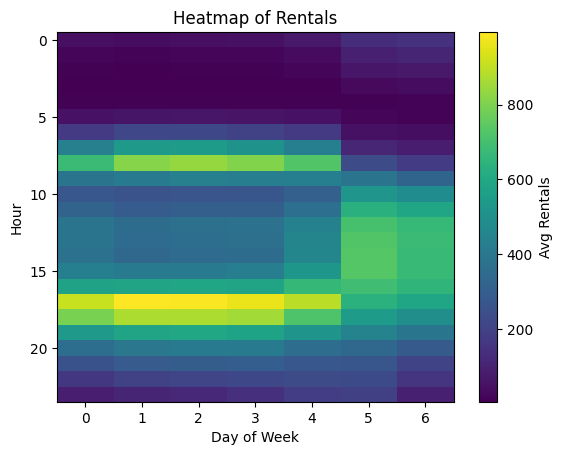

In [15]:
# Rentals by Combined Hour and Day
pivot = df.pivot_table(values='total', index='hr', columns='day_of_week', aggfunc='mean')

plt.imshow(pivot, aspect='auto')
plt.colorbar(label="Avg Rentals")
plt.xlabel("Day of Week")
plt.ylabel("Hour")
plt.title("Heatmap of Rentals")
plt.show()

What can we expect for forcasts into the future? Are we back on track or still recovering?

In [ ]:
# Daily Rentals Over Time
daily_totals = df.groupby('dteday')['total'].sum()

plt.plot(daily_totals.index, daily_totals.values)
plt.title("Total Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.show()



In [ ]:
# Average Trends
rolling = daily_totals.rolling(window=30).mean()

plt.plot(daily_totals.index, daily_totals.values, alpha=0.3, label="Daily")
plt.plot(rolling.index, rolling.values, color='red', label="30-Day Avg")
plt.legend()
plt.title("Trend in Bike Rentals")
plt.show()


In [ ]:
# Comparing Monthly
df['month'] = df['dteday'].dt.month
monthly = df.groupby('month')['total'].mean()

plt.bar(monthly.index, monthly.values)
plt.title("Average Rentals by Month")
plt.xlabel("Month")
plt.ylabel("Average Rentals")
plt.show()



In [ ]:
# Atempting Future Prediction
model = build_model(0.001)

model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

predictions = model.predict(X_val)

plt.scatter(y_val, predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Model Predictions")
plt.show()